### Correlation between each coverage metric (Metric 1&2) and Metric 6. 
The rationale is that “Classeswith low test coverage contain more bugs”

### Apache commons-collections

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
sns.set(style="whitegrid")

In [42]:
data = pd.read_excel('commons-collections-all_version.xlsx')

In [43]:
#calculate Statement Coverage
data['STATEMENT_COVERAGE'] =  (data['LINE_COVERED'] / (data['LINE_COVERED'] + data['LINE_MISSED']))

#calculate Branch Coverage
data['BRANCH_COVERAGE'] =  (data['BRANCH_COVERED'] / (data['BRANCH_COVERED'] + data['BRANCH_MISSED']))

data['Post Release Defect Density'] = data['Post Release Defect Density'] * 1000

In [44]:
data.head()

,VERSION,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Post Release Defect Density,STATEMENT_COVERAGE,BRANCH_COVERAGE
0,Commons-Collections-4.0,18.119171,103.329016,3.209845,11.031088,4.251295,25.277202,3.702073,12.303109,1.230570,7.580311,162.337662,0.856027,0.774604
1,Commons-Collections-4.1,17.293362,97.426124,2.869379,10.156317,4.072805,23.700214,3.436831,11.822270,1.235546,7.449679,165.852256,0.853354,0.779714
2,Commons-Collections-4.2,15.234043,99.312766,2.461702,10.557447,3.417021,24.297872,3.112766,12.136170,1.131915,7.546809,149.985904,0.876708,0.810917
3,Commons-Collections-4.3,15.140426,99.459574,2.451064,10.589362,3.395745,24.344681,3.100000,12.172340,1.129787,7.561702,149.409116,0.877589,0.812041
4,Commons-Collections-4.4,15.029598,99.727273,2.458774,10.638478,3.376321,24.431290,3.090909,12.236786,1.116279,7.602537,146.829811,0.878583,0.812268


### 1. Metric 1 and 6
Statement coverage and Post Defect Density

Text(0.5, 1.0, 'Statement coverage and Defect Density')

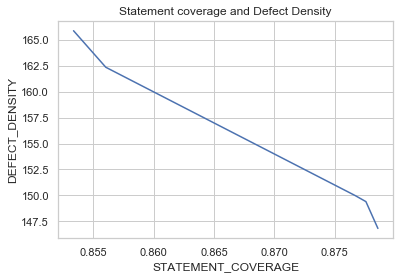

In [45]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x="STATEMENT_COVERAGE", y="Post Release Defect Density", data=data)
plt.ylabel("DEFECT_DENSITY")
plt.title("Statement coverage and Defect Density")

##### Corelation:

In [46]:
data[['STATEMENT_COVERAGE','Post Release Defect Density']].corr(method ='spearman')

,STATEMENT_COVERAGE,Post Release Defect Density
STATEMENT_COVERAGE,1.0,-1.0
Post Release Defect Density,-1.0,1.0


In [47]:
print(spearmanr(data['STATEMENT_COVERAGE'],data['Post Release Defect Density']))

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)


### This concludes that Classes with low Statement Coverage contain more bugs

### 2. Metric 2 and 6
Branch coverage and Post Defect Density

Text(0.5, 1.0, 'Branch Coverage and Defect Density')

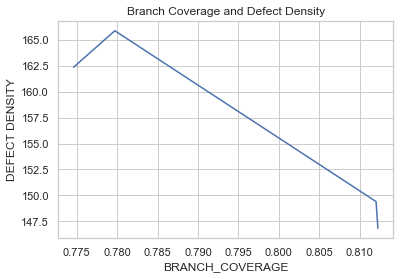

In [48]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x="BRANCH_COVERAGE", y="Post Release Defect Density", data=data)
plt.ylabel("DEFECT DENSITY")
plt.title("Branch Coverage and Defect Density")

##### Corelation:

In [49]:
data[['BRANCH_COVERAGE','Post Release Defect Density']].corr(method ='spearman')

,BRANCH_COVERAGE,Post Release Defect Density
BRANCH_COVERAGE,1.0,-0.9
Post Release Defect Density,-0.9,1.0


In [50]:
print(spearmanr(data['BRANCH_COVERAGE'],data['Post Release Defect Density']))

SpearmanrResult(correlation=-0.8999999999999998, pvalue=0.03738607346849874)


### This concludes that Classes with low Branch Coverage contain more bugs